# Team 4 Project
- Jordan Carouth
- Kimberley Davis
- Gabriel Louis
- Khan Nguyen

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
plt.rcParams['figure.dpi'] = 125

In [2]:
csv_file = "players_20.csv"
csv_path = os.path.join(".", "resources", csv_file)
csv_path

'.\\resources\\players_20.csv'

In [3]:
df = pd.read_csv(csv_path)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


## 1. Find the top 10 highest paid players

In [5]:
highest_paid = df.groupby(["short_name","wage_eur"]).size().reset_index()[["short_name","wage_eur"]]
highest_paid = highest_paid.sort_values(by = ["wage_eur"], ascending=False).set_index("short_name").head(10)
highest_paid = highest_paid.squeeze()
highest_paid

short_name
L. Messi             565000
E. Hazard            470000
Cristiano Ronaldo    405000
K. De Bruyne         370000
A. Griezmann         370000
L. Suárez            355000
L. Modrić            340000
T. Kroos             330000
S. Agüero            300000
Sergio Busquets      300000
Name: wage_eur, dtype: int64

## 2. Find the top 10 highest paying clubs by summing the player salaries

In [6]:
club_wage_series = df.groupby(["club"])["wage_eur"].sum().sort_values()
top10_clubs = club_wage_series[-10:]
top10_clubs

club
Paris Saint-Germain    2396000
FC Bayern München      2516000
Tottenham Hotspur      2603000
Liverpool              2667000
Chelsea                2806000
Manchester United      2874000
Juventus               3750000
Manchester City        3984000
FC Barcelona           4950000
Real Madrid            5354000
Name: wage_eur, dtype: int64

## 3. Create bar charts for numbers 1 and 2

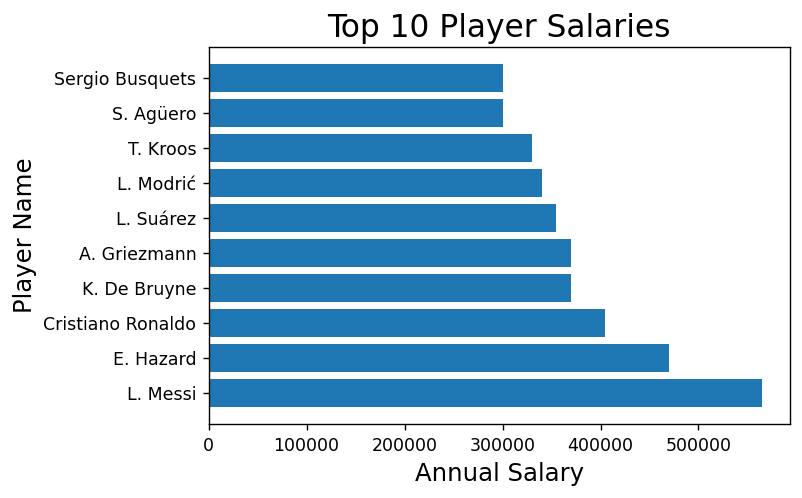

In [7]:
plt.barh(highest_paid.index, highest_paid)
plt.title('Top 10 Player Salaries', fontsize=18)
plt.xlabel('Annual Salary', fontsize=14)
plt.ylabel('Player Name', fontsize=14)
plt.show()

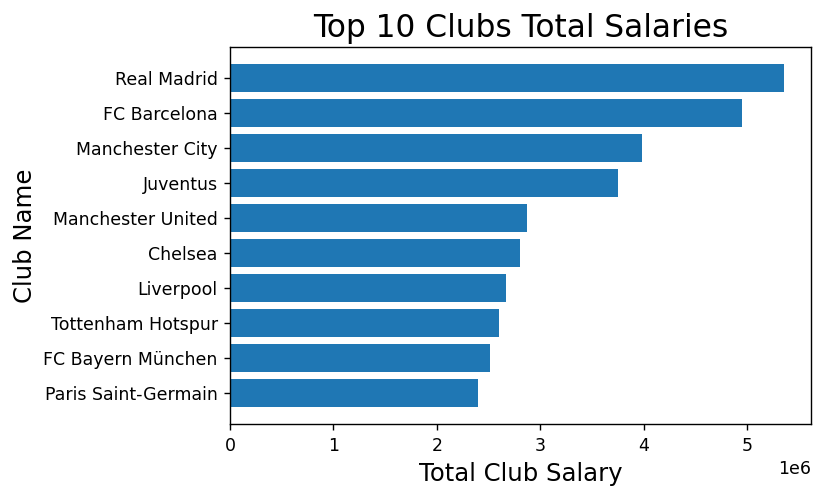

In [8]:
plt.barh(top10_clubs.index, top10_clubs)
plt.title('Top 10 Clubs Total Salaries', fontsize=18)
plt.xlabel('Total Club Salary', fontsize=14)
plt.ylabel('Club Name', fontsize=14)
plt.show()

## 4. Sort player_positions and team_positions by salary

In [9]:
players_pos_df = df.groupby(["player_positions"]).mean()
players_pos_df.sort_values(by=["wage_eur"], ascending=False, inplace=True)
players_pos_df["wage_eur"]

player_positions
RW, CF, ST      565000.0
CF, LW, ST      140000.0
CF, ST, LW      126000.0
CF, LM           93500.0
CF, LM, LW       89000.0
                  ...   
RB, ST            1000.0
RB, ST, RM        1000.0
LB, LM, CB         750.0
CB, LB, LM         500.0
RB, RWB, CDM         0.0
Name: wage_eur, Length: 643, dtype: float64

In [10]:
teams_pos_df = df.groupby(["team_position"]).mean()
teams_pos_df.sort_values(by=["wage_eur"], ascending=False, inplace=True)
teams_pos_df["wage_eur"]

team_position
CF     51714.285714
LW     23308.641975
RW     21024.844720
LF     17736.842105
CDM    17585.635359
ST     16451.965066
RF     16052.631579
RCM    14571.776156
LS     14338.461538
LCM    13800.486618
RS     13656.410256
CAM    12932.475884
CM     12473.684211
CB     12420.000000
RCB    12157.575758
LCB    12150.000000
RM     11634.085213
LM     11603.015075
GK     11256.797583
LDM    11165.289256
RDM    10491.803279
LAM    10434.782609
LB     10178.571429
RAM    10130.434783
RWB    10086.206897
RB     10082.142857
LWB     9603.448276
SUB     8166.112532
RES     5219.743070
Name: wage_eur, dtype: float64

## 5. Find the average salaries for left vs. right footed players

In [11]:
foot_df = df.groupby(["preferred_foot"]).mean().iloc[:,8]
foot_df

preferred_foot
Left     1.099815
Right    1.104226
Name: international_reputation, dtype: float64

## 6. Create a line plot of number of players vs birth year

In [12]:
df["dob"] = pd.DatetimeIndex(df["dob"]).year
num_vs_year = df.groupby(["dob"]).size()
num_vs_year

dob
1977       3
1978       6
1979      18
1980      26
1981      63
1982      94
1983     168
1984     353
1985     365
1986     514
1987     659
1988     891
1989     940
1990    1038
1991    1143
1992    1317
1993    1329
1994    1293
1995    1308
1996    1374
1997    1454
1998    1296
1999    1193
2000     911
2001     404
2002     118
dtype: int64

Text(0, 0.5, 'Number of Players')

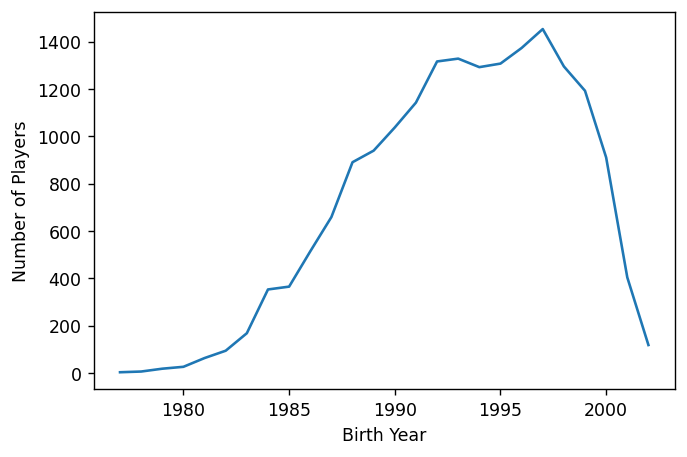

In [13]:
plt.plot(num_vs_year)
plt.xlabel('Birth Year')
plt.ylabel('Number of Players')

## 7. Create a Pie chart of total number of players by club for the top ten paying clubs

In [14]:
club_series = df.groupby(["club"]).size().sort_values()
club_series = club_series[club_series.index.isin(top10_clubs.index)]
club_series

club
FC Bayern München      23
Liverpool              33
Manchester City        33
Paris Saint-Germain    33
Manchester United      33
Chelsea                33
Juventus               33
Tottenham Hotspur      33
Real Madrid            33
FC Barcelona           33
dtype: int64

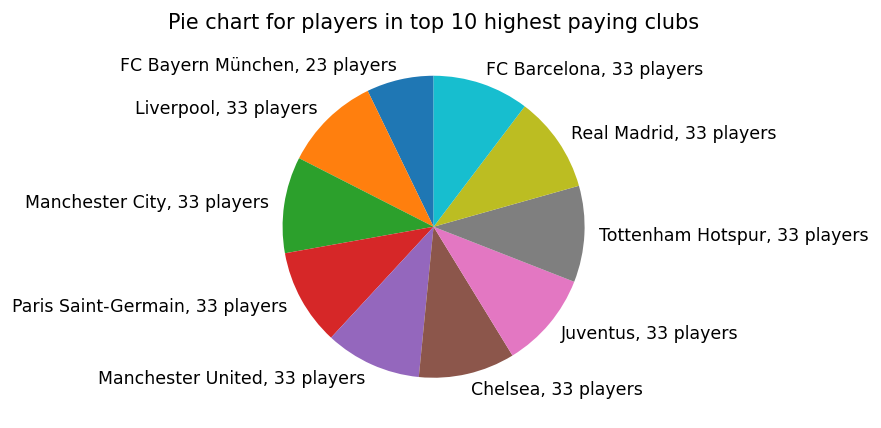

In [15]:
labels = [f"{club}, {club_series[club]} players" for club in club_series.index]
plt.pie(club_series, labels=labels, startangle=90)
plt.title("Pie chart for players in top 10 highest paying clubs")
plt.show()

## 8. Examine the data and find any correlations you find interesting

In [16]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle (since mirrored) of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find index of feature columns with correlation greater than 95%
to_keep = [column for column in upper.columns if any(upper[column] > 0.95)]
to_keep

['dob',
 'release_clause_eur',
 'attacking_finishing',
 'skill_dribbling',
 'movement_acceleration',
 'movement_sprint_speed',
 'power_shot_power',
 'mentality_interceptions',
 'defending_marking',
 'defending_standing_tackle',
 'defending_sliding_tackle',
 'goalkeeping_diving',
 'goalkeeping_handling',
 'goalkeeping_kicking',
 'goalkeeping_positioning',
 'goalkeeping_reflexes']

## 9. Create any number of dataframes that represent this correlation

In [17]:
# Correlations above 95%
high_corr = df[to_keep].corr()
high_corr

,dob,release_clause_eur,attacking_finishing,skill_dribbling,movement_acceleration,movement_sprint_speed,power_shot_power,mentality_interceptions,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
dob,1.000000,-0.065541,-0.080636,-0.017683,0.151509,0.142476,-0.262874,-0.195306,-0.156193,-0.115967,-0.100230,-0.108982,-0.111531,-0.111170,-0.119971,-0.110496
release_clause_eur,-0.065541,1.000000,0.249794,0.266518,0.162968,0.168327,0.350093,0.155735,0.154231,0.126145,0.103819,-0.020604,-0.020347,-0.021497,-0.019247,-0.020396
attacking_finishing,-0.080636,0.249794,1.000000,0.829514,0.610355,0.597794,0.724922,-0.008241,0.038772,-0.014762,-0.053809,-0.593162,-0.591540,-0.588609,-0.589306,-0.591220
skill_dribbling,-0.017683,0.266518,0.829514,1.000000,0.747601,0.727790,0.607364,0.307204,0.351134,0.318368,0.290333,-0.760779,-0.759155,-0.756594,-0.756841,-0.760523
movement_acceleration,0.151509,0.162968,0.610355,0.747601,1.000000,0.923721,0.352961,0.154667,0.195848,0.168632,0.161988,-0.595511,-0.597777,-0.595174,-0.595242,-0.596642
movement_sprint_speed,0.142476,0.168327,0.597794,0.727790,0.923721,1.000000,0.354955,0.169289,0.213442,0.186478,0.178645,-0.601084,-0.603992,-0.601125,-0.600734,-0.602147
power_shot_power,-0.262874,0.350093,0.724922,0.607364,0.352961,0.354955,1.000000,0.058830,0.073696,0.025293,-0.009710,-0.281808,-0.282039,-0.272821,-0.276598,-0.281490
mentality_interceptions,-0.195306,0.155735,-0.008241,0.307204,0.154667,0.169289,0.058830,1.000000,0.907401,0.945287,0.933894,-0.485314,-0.486036,-0.484943,-0.482027,-0.487515
defending_marking,-0.156193,0.154231,0.038772,0.351134,0.195848,0.213442,0.073696,0.907401,1.000000,0.918593,0.909153,-0.544390,-0.545373,-0.542991,-0.540967,-0.546268
defending_standing_tackle,-0.115967,0.126145,-0.014762,0.318368,0.168632,0.186478,0.025293,0.945287,0.918593,1.000000,0.975808,-0.533440,-0.534141,-0.533623,-0.530873,-0.535822


In [18]:
extra_corr = df[["defending_standing_tackle", "defending_sliding_tackle", "goalkeeping_positioning", "goalkeeping_reflexes"]]
extra_corr

,defending_standing_tackle,defending_sliding_tackle,goalkeeping_positioning,goalkeeping_reflexes
0,37,26,14,8
1,32,24,14,11
2,26,29,15,11
3,12,18,90,89
4,27,22,8,8
...,...,...,...,...
18273,50,52,5,14
18274,53,57,11,9
18275,52,46,6,14
18276,44,54,13,13


## 10. Visualize this correlation with at least two plots, using one chart type we did not go over in class

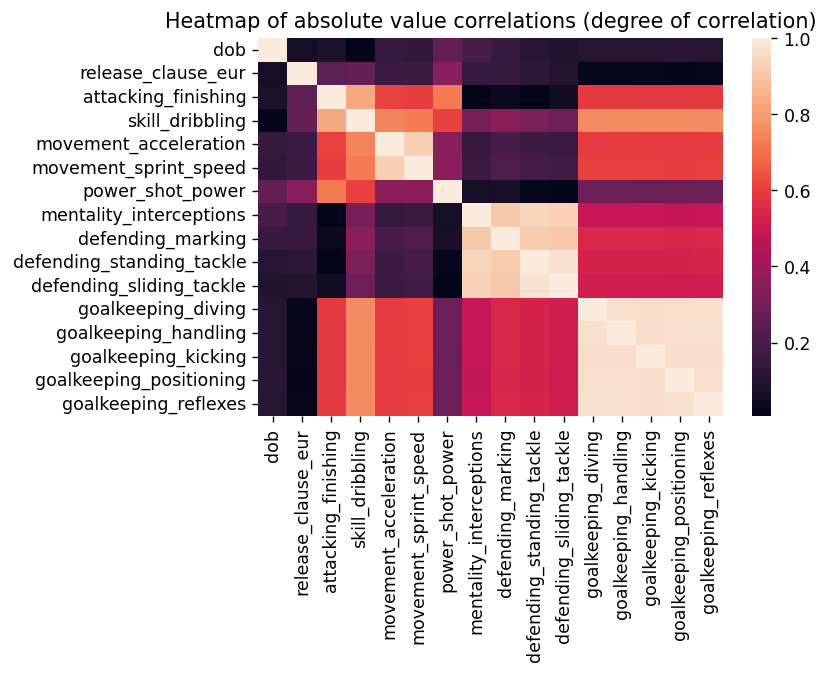

In [19]:
import seaborn as sns

sns.heatmap(high_corr.abs())
plt.title("Heatmap of absolute value correlations (degree of correlation)")
plt.show()

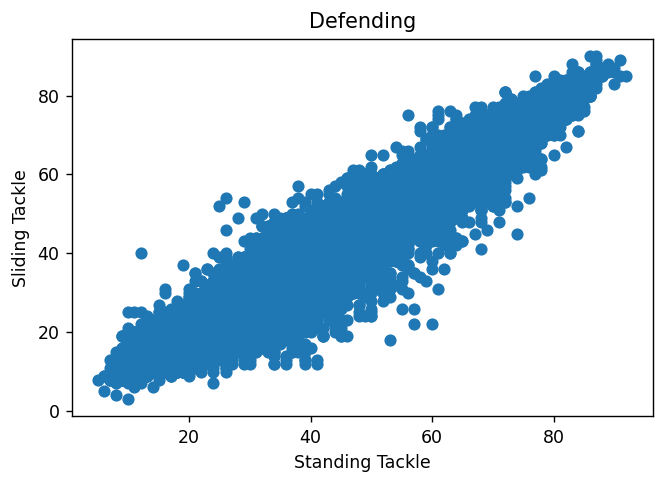

In [20]:
plt.scatter(x = extra_corr["defending_standing_tackle"], y = extra_corr["defending_sliding_tackle"])
plt.title("Defending")
plt.xlabel("Standing Tackle")
plt.ylabel("Sliding Tackle")
plt.show()

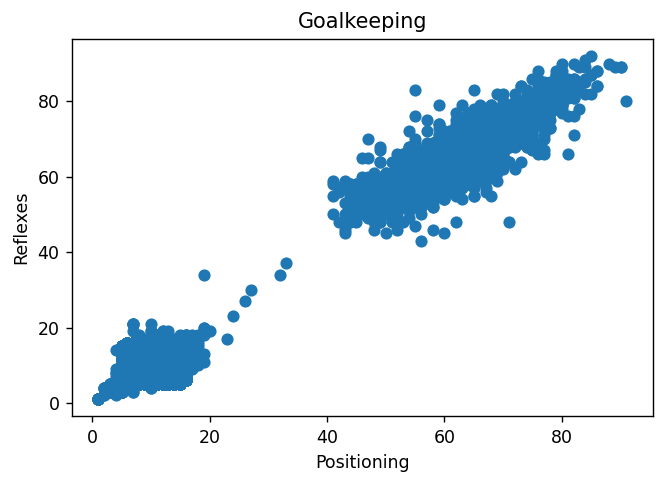

In [21]:
plt.scatter(x = extra_corr["goalkeeping_positioning"], y = extra_corr["goalkeeping_reflexes"])
plt.title("Goalkeeping")
plt.xlabel("Positioning")
plt.ylabel("Reflexes")
plt.show()